In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as pt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix

In [103]:
#!pip install graphviz
#brew install graphviz
#!conda install python-graphviz

In [104]:
#!pip install pydotplus

In [105]:
#conda install -c anaconda graphviz   

In [106]:
data_train = pd.read_csv('/Users/huzaifkherani/Desktop/AML/Project/DATA/data.csv')
data_test = pd.read_csv('/Users/huzaifkherani/Desktop/AML/Project/DATA/test.csv')

In [107]:
data_train.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

# Exploratory Data Analysis

In [108]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [109]:
data_train.isnull().sum() # Checking if there is any null value in the dataset

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [110]:
data_train.drop(['Accident_ID'],axis=1,inplace=True)

In [111]:
# Drop the target and check how the features correlate
data_train.drop("Severity", axis=1).corr()

Safety_Score  Days_Since_Inspection  \
Safety_Score                 1.000000              -0.685386   
Days_Since_Inspection       -0.685386               1.000000   
Total_Safety_Complaints      0.057726              -0.032055   
Control_Metric               0.000564              -0.011963   
Turbulence_In_gforces        0.019603              -0.001564   
Cabin_Temperature            0.032747              -0.039140   
Accident_Type_Code           0.173930              -0.024718   
Max_Elevation                0.004451               0.000183   
Violations                   0.041735              -0.016724   
Adverse_Weather_Metric      -0.107925               0.040804   

                         Total_Safety_Complaints  Control_Metric  \
Safety_Score                            0.057726        0.000564   
Days_Since_Inspection                  -0.032055       -0.011963   
Total_Safety_Complaints                 1.000000       -0.019665   
Control_Metric                         -0.019665        1.000000   
Turbulence_In_gforces                   0.066412       -0.643285   
Cabin_Temperature                       0.013590       -0.008330   
Accident_Type_Code                      0.034927        0.008385   
Max_Elevation                           0.036855       -0.028375   
Violations                             -0.019005       -0.003284   
Adverse_Weather_Metric                 -0.002713       -0.028296   

                         Turbulence_In_gforces  Cabin_Temperature  \
Safety_Score                          0.019603           0.032747   
Days_Since_Inspection                -0.001564          -0.039140   
Total_Safety_Complaints               0.066412           0.013590   
Control_Metric                       -0.643285          -0.008330   
Turbulence_In_gforces                 1.000000           0.010757   
Cabin_Temperature                     0.010757           1.000000   
Accident_Type_Code                   -0.007565           0.030682   
Max_Elevation                         0.047625          -0.009186   
Violations                            0.013171           0.018619   
Adverse_Weather_Metric                0.039802          -0.026647   

                         Accident_Type_Code  Max_Elevation  Violations  \
Safety_Score                       0.173930       0.004451    0.041735   
Days_Since_Inspection             -0.024718       0.000183   -0.016724   
Total_Safety_Complaints            0.034927       0.036855   -0.019005   
Control_Metric                     0.008385      -0.028375   -0.003284   
Turbulence_In_gforces             -0.007565       0.047625    0.013171   
Cabin_Temperature                  0.030682      -0.009186    0.018619   
Accident_Type_Code                 1.000000       0.019970    0.046379   
Max_Elevation                      0.019970       1.000000   -0.030513   
Violations                         0.046379      -0.030513    1.000000   
Adverse_Weather_Metric            -0.739361       0.173436   -0.021578   

                         Adverse_Weather_Metric  
Safety_Score                          -0.107925  
Days_Since_Inspection                  0.040804  
Total_Safety_Complaints               -0.002713  
Control_Metric                        -0.028296  
Turbulence_In_gforces                  0.039802  
Cabin_Temperature                     -0.026647  
Accident_Type_Code                    -0.739361  
Max_Elevation                          0.173436  
Violations                            -0.021578  
Adverse_Weather_Metric                 1.000000

# Observations
#### Days since inspection has a strong -ve correlation with Safety Score
#### Turbulence in gforces has a strong -ve correlation with Control Metric
#### Accident type code has a weak +ve correlation with the Safety Score
#### Adverse Weather Metric has a strong -ve correlation with Accident Type Code
#### Adverse Weather Metric has a weak +ve correlation with Max Elevation

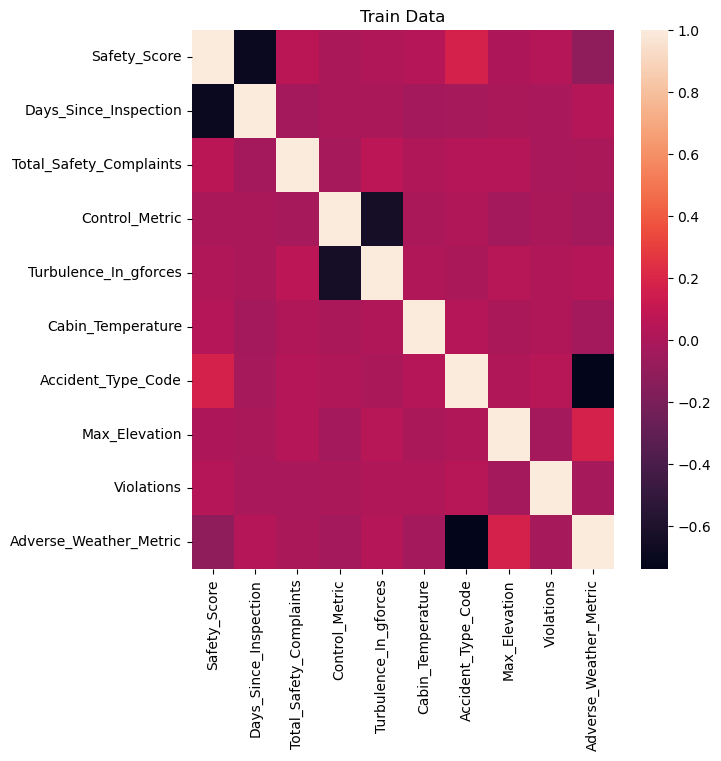

In [112]:
# Checking Corelation
pt.figure(figsize = (15, 7))
pt.subplot(1, 2, 1)
pt.title("Train Data")
sns.heatmap(data_train.corr())
pt.savefig('Correlation Heatmap.png')

In [113]:
inspec = data_train[data_train["Days_Since_Inspection"] == 1]
inspec

Severity  Safety_Score  \
840   Significant_Damage_And_Serious_Injuries     58.675799   
2283  Significant_Damage_And_Serious_Injuries     58.493151   
2611                Highly_Fatal_And_Damaging     65.342466   
7903                Highly_Fatal_And_Damaging     65.342466   
8152  Significant_Damage_And_Serious_Injuries     58.493151   

      Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
840                       1                        2       75.387420   
2283                      1                        5       75.387420   
2611                      1                       19       77.848678   
7903                      1                        8       58.204193   
8152                      1                       20       67.046490   

      Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
840                0.336308              75.96                   6   
2283               0.245792              76.11                   6   
2611               0.361191              79.65                   2   
7903               0.312146              79.43                   2   
8152               0.409514              79.72                   7   

      Max_Elevation  Violations  Adverse_Weather_Metric  
840    29146.687854           3                0.007526  
2283   16149.317704           3                0.003679  
2611   31661.628810           2                0.429535  
7903   28183.323130           2                0.382453  
8152   25135.851480           2                0.002300

/Users/huzaifkherani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


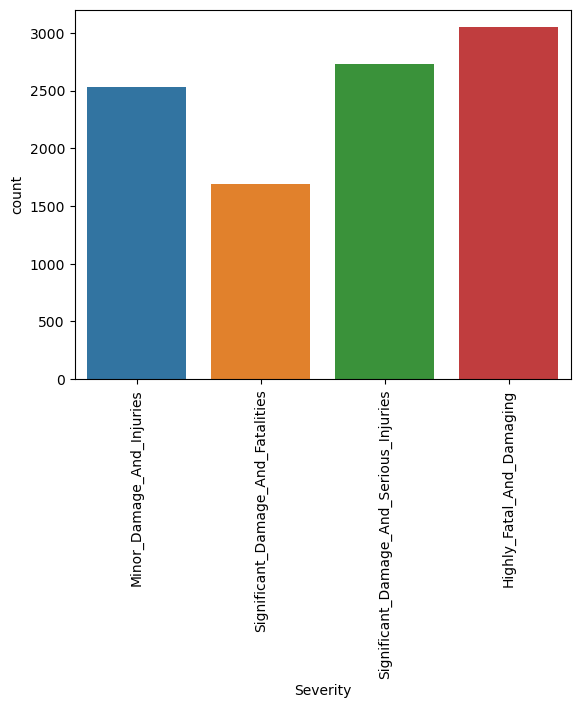

In [115]:
pt.figure()
pt.xticks(rotation = 90)
sns.countplot(data_train['Severity'])
pt.savefig('Severity vs Count graph.png')

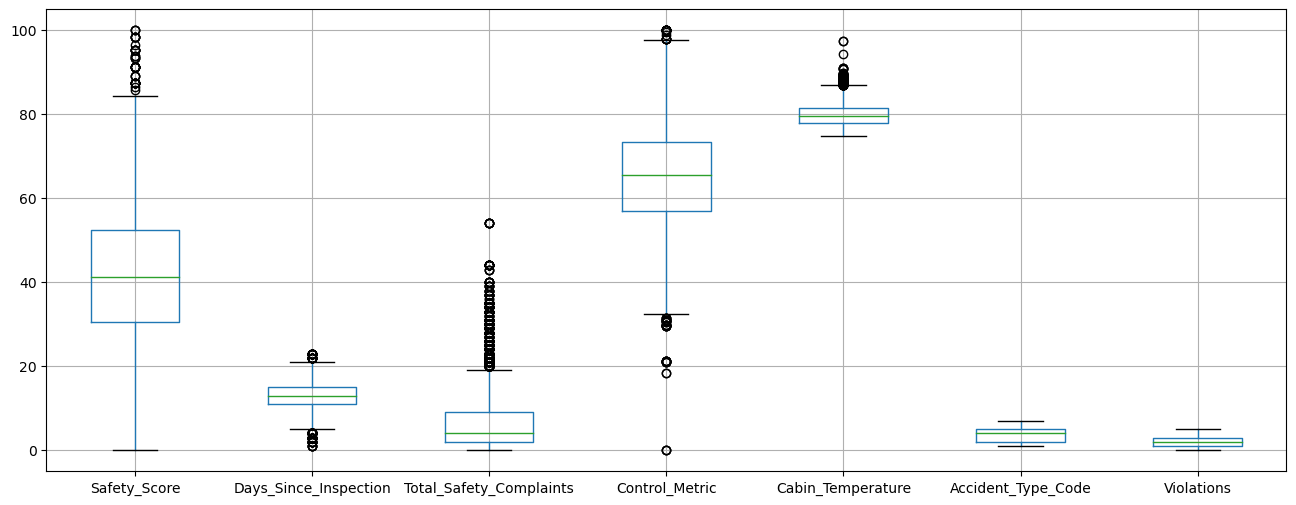

In [116]:
# "Accident_Type_Code" and "Severity" are a Categorical variable hence, removing it 
pt.figure(figsize=(16,6))
data_train.boxplot(column=['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 
                                   'Cabin_Temperature', 'Accident_Type_Code', 'Violations'])
pt.savefig('Box plot 1.png')

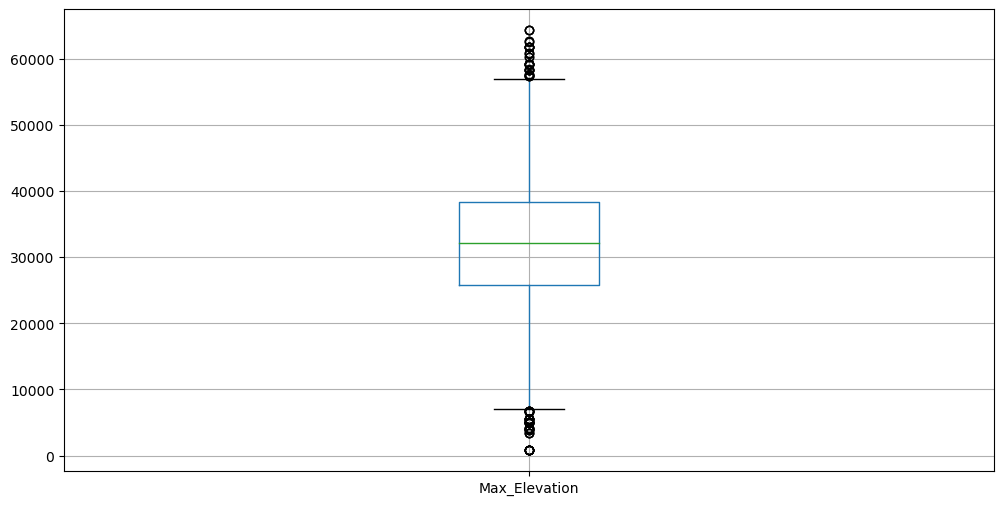

In [117]:
pt.figure(figsize=(12,6))
data_train.boxplot(column=['Max_Elevation'])
pt.savefig('Boxplot 2.png')

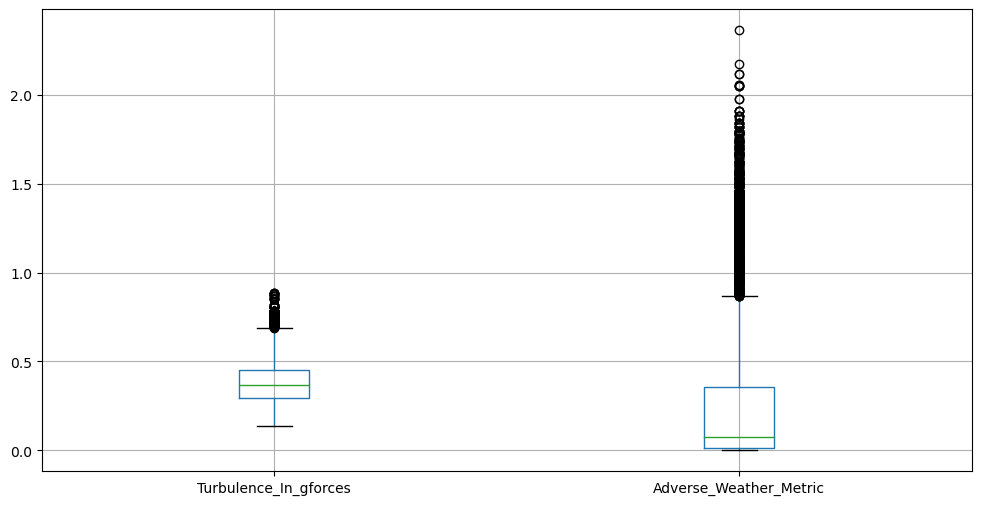

In [118]:
pt.figure(figsize=(12,6))
data_train.boxplot(column=['Turbulence_In_gforces', 'Adverse_Weather_Metric'])
pt.savefig('Boxplot 3.png')

In [119]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 859.5+ KB


In [120]:
data_num = pd.DataFrame(data_train, columns = data_train.columns[data_train.dtypes == 'float64']) 
data_num.head()

Safety_Score  Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0     49.223744       71.285324               0.272118              78.04   
1     62.465753       72.288058               0.423939              84.54   
2     63.059361       66.362808               0.322604              78.86   
3     48.082192       74.703737               0.337029              81.79   
4     26.484018       47.948952               0.541140              77.16   

   Max_Elevation  Adverse_Weather_Metric  
0   31335.476824                0.424352  
1   26024.711057                0.352350  
2   39269.053927                0.003364  
3   42771.499200                0.211728  
4   35509.228515                0.176883

In [121]:
# Applying zscore

In [122]:
data_num=data_num.apply(zscore)

In [123]:
data_num.head()

Safety_Score  Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0      0.455303        0.516733              -0.901749          -0.699134   
1      1.275888        0.601122               0.349922           1.656279   
2      1.312673        0.102462              -0.485516          -0.401990   
3      0.384562        0.804422              -0.366593           0.659758   
4     -0.953841       -1.447221               1.316177          -1.018021   

   Max_Elevation  Adverse_Weather_Metric  
0      -0.070649                0.442701  
1      -0.633736                0.253773  
2       0.770528               -0.661939  
3       1.141883               -0.115208  
4       0.371883               -0.206638

# Removing all records with z-score greater and lesser than 3 and -3 respectively.

In [124]:
floats = data_num.columns[data_num.dtypes == 'float64']
for columns in floats:
    indexNames_larger = data_num[data_num[columns]>3].index
    indexNames_lesser = data_num[data_num[columns]<-3].index
    # Delete these row indexes from dataFrame
    data_num.drop(indexNames_larger , inplace=True)
    data_num.drop(indexNames_lesser , inplace=True)
    data_train.drop(indexNames_larger , inplace=True)
    data_train.drop(indexNames_lesser , inplace=True)

In [125]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9507 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Safety_Score            9507 non-null   float64
 1   Control_Metric          9507 non-null   float64
 2   Turbulence_In_gforces   9507 non-null   float64
 3   Cabin_Temperature       9507 non-null   float64
 4   Max_Elevation           9507 non-null   float64
 5   Adverse_Weather_Metric  9507 non-null   float64
dtypes: float64(6)
memory usage: 519.9 KB


# 493 records were removed as they were considered outliers

# Merging the scaled columns back to the original dataframe

In [126]:
data_train.drop(data_train.columns[data_train.dtypes == 'float64'],axis=1,inplace=True)

In [127]:
data_train.head()

Severity  Days_Since_Inspection  \
0                Minor_Damage_And_Injuries                     14   
1                Minor_Damage_And_Injuries                     10   
2        Significant_Damage_And_Fatalities                     13   
3  Significant_Damage_And_Serious_Injuries                     11   
4        Significant_Damage_And_Fatalities                     13   

   Total_Safety_Complaints  Accident_Type_Code  Violations  
0                       22                   2           3  
1                       27                   2           2  
2                       16                   7           3  
3                        9                   3           1  
4                       25                   3           2

In [128]:
for column in data_num.columns:
    data_train[column]=data_num[column]

In [129]:
data_train.head()

Severity  Days_Since_Inspection  \
0                Minor_Damage_And_Injuries                     14   
1                Minor_Damage_And_Injuries                     10   
2        Significant_Damage_And_Fatalities                     13   
3  Significant_Damage_And_Serious_Injuries                     11   
4        Significant_Damage_And_Fatalities                     13   

   Total_Safety_Complaints  Accident_Type_Code  Violations  Safety_Score  \
0                       22                   2           3      0.455303   
1                       27                   2           2      1.275888   
2                       16                   7           3      1.312673   
3                        9                   3           1      0.384562   
4                       25                   3           2     -0.953841   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0        0.516733              -0.901749          -0.699134      -0.070649   
1        0.601122               0.349922           1.656279      -0.633736   
2        0.102462              -0.485516          -0.401990       0.770528   
3        0.804422              -0.366593           0.659758       1.141883   
4       -1.447221               1.316177          -1.018021       0.371883   

   Adverse_Weather_Metric  
0                0.442701  
1                0.253773  
2               -0.661939  
3               -0.115208  
4               -0.206638

# Label Encoding the Target Column

In [130]:
data_train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [131]:
encoder=LabelEncoder()
data_train['Severity']=encoder.fit_transform(data_train['Severity'])

In [132]:
data_train.head()

Severity  Days_Since_Inspection  Total_Safety_Complaints  \
0         1                     14                       22   
1         1                     10                       27   
2         2                     13                       16   
3         3                     11                        9   
4         2                     13                       25   

   Accident_Type_Code  Violations  Safety_Score  Control_Metric  \
0                   2           3      0.455303        0.516733   
1                   2           2      1.275888        0.601122   
2                   7           3      1.312673        0.102462   
3                   3           1      0.384562        0.804422   
4                   3           2     -0.953841       -1.447221   

   Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0              -0.901749          -0.699134      -0.070649   
1               0.349922           1.656279      -0.633736   
2              -0.485516          -0.401990       0.770528   
3              -0.366593           0.659758       1.141883   
4               1.316177          -1.018021       0.371883   

   Adverse_Weather_Metric  
0                0.442701  
1                0.253773  
2               -0.661939  
3               -0.115208  
4               -0.206638

In [133]:
# Checking the unique values for dependent Variable (Severity)
data_train.Severity.unique()

array([1, 2, 3, 0])

In [134]:
# Checking the Unique Values in Accident_Type_Code
data_train.Accident_Type_Code.unique()

array([2, 7, 3, 4, 1, 6, 5])

In [135]:
# Checking the Unqiue Values in Violations
data_train.Violations.unique()

array([3, 2, 1, 0, 4, 5])

In [136]:
# Checking the Unqiue Values in days since inspection
data_train.Days_Since_Inspection.unique()

array([14, 10, 13, 11, 15, 18,  5,  6, 12,  7,  8, 17,  9, 16, 20, 19, 21,
        3,  4,  1, 22,  2, 23])

In [137]:
data_train['Severity'].describe()
# A description (4 level factor) on the severity of the crash

count    9507.000000
mean        1.416430
std         1.183658
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: Severity, dtype: float64

In [138]:
data_train['Safety_Score'].describe() 
# It gives a measure of how safe the plane was deemed to be.

count    9507.000000
mean       -0.000848
std         0.983860
min        -2.595013
25%        -0.690688
50%        -0.034219
75%         0.659034
max         2.925549
Name: Safety_Score, dtype: float64

In [139]:
data_train['Days_Since_Inspection'].describe() 
# It gives measure of how long the plane without inspection before incident

count    9507.000000
mean       12.957926
std         3.514377
min         1.000000
25%        11.000000
50%        13.000000
75%        15.000000
max        23.000000
Name: Days_Since_Inspection, dtype: float64

In [140]:
data_train['Total_Safety_Complaints'].describe()
# No. of complaints from mechanics prior to accident.

count    9507.000000
mean        6.497633
std         6.886067
min         0.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        54.000000
Name: Total_Safety_Complaints, dtype: float64

In [141]:
data_train['Control_Metric'].describe()
# An estimation of how much control the pilot had during the incident given the factors at play.

count    9507.000000
mean        0.022516
std         0.972893
min        -2.966217
25%        -0.662790
50%         0.052596
75%         0.697018
max         2.933317
Name: Control_Metric, dtype: float64

In [142]:
data_train['Turbulence_In_gforces'].describe()
# Recorded turbulence experienced at the time of accident.

count    9507.000000
mean       -0.038054
std         0.942622
min        -2.040443
25%        -0.729310
50%        -0.149557
75%         0.547633
max         2.960296
Name: Turbulence_In_gforces, dtype: float64

In [143]:
data_train['Cabin_Temperature'].describe()
# Last recorded temp before incident.

count    9507.000000
mean       -0.030554
std         0.947306
min        -1.894959
25%        -0.731747
50%        -0.162825
75%         0.551047
max         2.975310
Name: Cabin_Temperature, dtype: float64

In [144]:
data_train['Max_Elevation'].describe()
# Height from the ground in mts.

count    9507.000000
mean       -0.034620
std         0.973693
min        -2.984254
25%        -0.674868
50%        -0.032461
75%         0.620405
max         2.995312
Name: Max_Elevation, dtype: float64

In [146]:
data_train['Violations'].describe()
# Number of Violations aircraft received during inspection.

count    9507.000000
mean        2.011255
std         1.037271
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Violations, dtype: float64

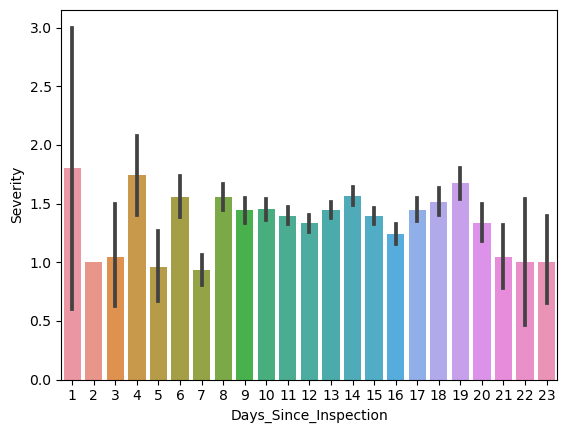

In [147]:
sns.barplot(x = "Days_Since_Inspection", y = "Severity", data = data_train)
pt.savefig('Days since inspection vs Severity.png')

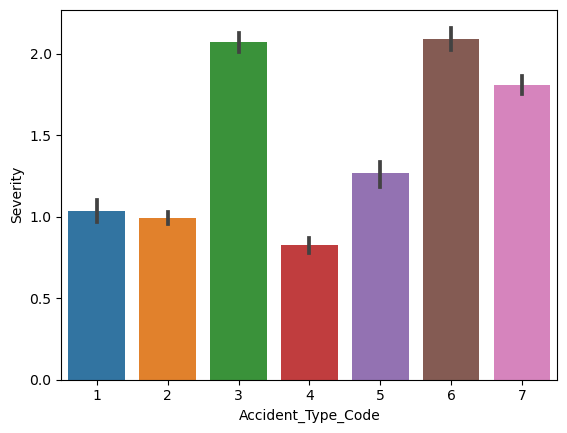

In [148]:
sns.barplot(x = "Accident_Type_Code", y = "Severity", data = data_train)
pt.savefig('Accident type code vs Severity.png')

# Feature Engineering

In [149]:
data_train['Total_Safety_Complaints'] = np.power(2, data_train['Total_Safety_Complaints'])
data_train['Days_Since_Inspection'] = np.power(2, data_train['Days_Since_Inspection'])
data_train['Safety_Score'] = np.power(2, data_train['Safety_Score'])

In [150]:
X=data_train.drop(['Severity'],axis=1)

In [151]:
y=data_train['Severity']

# Splitting Data into Train and Test

In [152]:
# Split dataset into training set and Validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 90% training and 10% test


In [153]:
print(X_train.shape)
print(X_test.shape)

(8556, 10)
(951, 10)


# Decision Tree

In [154]:
#making the instance
from sklearn.model_selection import GridSearchCV
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [5,10,15,20,25,50,100], 
          'min_samples_leaf':[5,6,7,8,9,10,11],
             'max_depth':[5,10,15,25,100],
             'criterion':['gini','entropy']}


# Create grid search object
clf1 = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

# Fit on data
best_clf_dt = clf1.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("Accuracy", accuracy_score(y_test,predictions))
print("CLASSIFICATION - REPORT \n")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy 0.7886435331230284
CLASSIFICATION - REPORT 

Confusion matrix 
 [[233  24   6  21]
 [ 17 189   9  21]
 [ 12  11 126  11]
 [ 24  32  13 202]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       284
           1       0.74      0.80      0.77       236
           2       0.82      0.79      0.80       160
           3       0.79      0.75      0.77       271

    accuracy                           0.79       951
   macro avg       0.79      0.79      0.79       951
weighted avg       0.79      0.79      0.79       951



In [155]:
clf1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=5, min_samples_split=20,
                       random_state=1234)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.43098 to fit



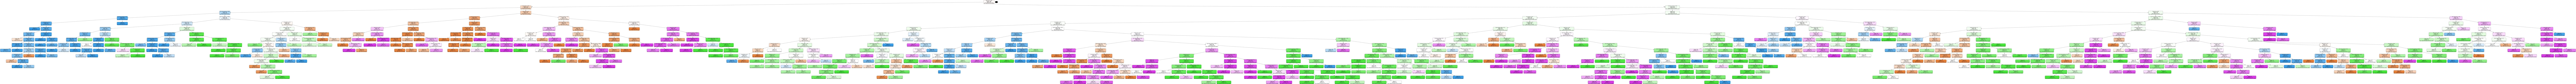

In [156]:
dot_data = StringIO()  
export_graphviz(clf1.best_estimator_, out_file=dot_data, filled=True,rounded=True,
                feature_names=X.columns,
                class_names=['Highly_Fatal_And_Damaging','Significant_Damage_And_Serious_Injuries', 'Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities' ]) 
                 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[1,2,3,4,5],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy of Random Forest:  0.8958990536277602
Confusion matrix 
 [[260   9   7   8]
 [  5 222   3   6]
 [  5  14 135   6]
 [ 20  14   2 235]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       284
           1       0.86      0.94      0.90       236
           2       0.92      0.84      0.88       160
           3       0.92      0.87      0.89       271

    accuracy                           0.90       951
   macro avg       0.90      0.89      0.89       951
weighted avg       0.90      0.90      0.90       951



# Gradient Boosting

In [158]:
param_grid = {"n_estimators":[10,20,40,100],'max_depth':[3,4,5,6]}

In [159]:
gb_model = GradientBoostingClassifier()

In [160]:
grid = GridSearchCV(gb_model,param_grid)

In [161]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 40, 100]})

In [162]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [163]:
predictions = grid.predict(X_test)

In [164]:
predictions

array([2, 0, 0, 2, 2, 3, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 2, 3, 0,
       2, 0, 1, 2, 0, 0, 1, 3, 1, 0, 0, 1, 1, 0, 2, 0, 3, 1, 2, 2, 3, 0,
       2, 3, 3, 0, 1, 2, 0, 1, 3, 0, 3, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 3,
       0, 2, 3, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 3, 1, 1, 2, 2, 3, 3, 3,
       0, 1, 3, 0, 0, 3, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 2, 1, 1, 2, 3, 1,
       1, 3, 3, 0, 0, 2, 1, 3, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3,
       0, 0, 3, 0, 0, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 3, 0, 3, 1, 0, 0, 1,
       1, 1, 1, 3, 1, 1, 0, 1, 1, 3, 2, 0, 1, 2, 1, 0, 3, 0, 3, 1, 2, 0,
       3, 3, 0, 1, 0, 1, 0, 3, 0, 1, 1, 2, 3, 1, 0, 3, 0, 1, 0, 0, 1, 0,
       0, 2, 3, 2, 3, 3, 1, 1, 1, 3, 2, 2, 3, 0, 0, 1, 3, 0, 3, 2, 1, 3,
       2, 0, 3, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 3, 1, 1, 3, 3, 3,
       2, 1, 0, 1, 2, 3, 1, 3, 3, 1, 0, 3, 1, 0, 0, 0, 1, 3, 3, 1, 3, 1,
       2, 3, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 0, 1, 1, 1, 1,
       3, 3, 0, 0, 3, 0, 1, 3, 3, 1, 3, 0, 3, 3, 3,

In [165]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       284
           1       0.95      0.96      0.95       236
           2       0.96      0.94      0.95       160
           3       0.96      0.95      0.96       271

    accuracy                           0.95       951
   macro avg       0.95      0.95      0.95       951
weighted avg       0.95      0.95      0.95       951



In [166]:
grid.best_estimator_.feature_importances_

array([0.23248155, 0.00444364, 0.11745429, 0.00130897, 0.39282962,
       0.20015629, 0.00886979, 0.00506198, 0.0062014 , 0.03119247])

In [167]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948667 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.5}
0.531000 (0.095371) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.526667 (0.080925) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.524000 (0.072874) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.774000 (0.035176) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.771000 (0.041821) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.738667 (0.049982) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.828000 (0.032599) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.812333 (0.038874) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.761000 (0.043077) with: {'learning_rate': 0.0001,

# Extreme Gradient Boosting

In [168]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

#Pipeline
pipe_XGB = Pipeline([('XGB', XGBClassifier())]) 

#Parameter-grid
param_grid = {'XGB__learning_rate':[0.1,0.2],'XGB__max_depth' :[5,10], 'XGB__gamma':[0.1,0.3]} 
 
#Using RandomSearchCV
Random_XGB = RandomizedSearchCV( pipe_XGB , param_distributions=param_grid, cv= 10, n_iter=3) 
#Fitting the data in the model
Random_XGB.fit(X_train, y_train)

print(" Best cross-validation score obtained is: {:.2f}". format( Random_XGB.best_score_)) 
print(" Best parameters as part of Gridsearch is: ", Random_XGB.best_params_) 
print(" Train set score obtained is: {:.2f}". format( Random_XGB.score( X_train, y_train)))
print(" Test set score obtained is: {:.2f}". format( Random_XGB.score( X_test, y_test)))

 Best cross-validation score obtained is: 0.96
 Best parameters as part of Gridsearch is:  {'XGB__max_depth': 10, 'XGB__learning_rate': 0.2, 'XGB__gamma': 0.1}
 Train set score obtained is: 1.00
 Test set score obtained is: 0.95


In [169]:
y_pred=Random_XGB.predict(X_test)

In [170]:
accuracy_score=metrics.accuracy_score(y_test,y_pred)
percision_score=metrics.precision_score(y_test,y_pred,average='macro')
recall_score=metrics.recall_score(y_test,y_pred,average='macro')
f1_score=metrics.f1_score(y_test,y_pred,average='macro')
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percision of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The f1 score of this model is {0:.2f}%".format(f1_score*100))

The Accuracy of this model is 95.48%
The Percision of this model is 95.39%
The Recall score of this model is 95.45%
The f1 score of this model is 95.42%


In [171]:
Random_XGB.cv_results_

{'mean_fit_time': array([0.8595073 , 1.68227882, 1.90001009]),
 'std_fit_time': array([0.03904033, 0.2197148 , 0.2283124 ]),
 'mean_score_time': array([0.00340602, 0.00441206, 0.0054944 ]),
 'std_score_time': array([0.00050047, 0.00044998, 0.00079496]),
 'param_XGB__max_depth': masked_array(data=[5, 10, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_XGB__learning_rate': masked_array(data=[0.1, 0.2, 0.1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_XGB__gamma': masked_array(data=[0.1, 0.1, 0.3],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'XGB__max_depth': 5,
   'XGB__learning_rate': 0.1,
   'XGB__gamma': 0.1},
  {'XGB__max_depth': 10, 'XGB__learning_rate': 0.2, 'XGB__gamma': 0.1},
  {'XGB__max_depth': 10, 'XGB__learning_rate': 0.1, 'XGB__gamma': 0.3}],
 'split0_test_score': array([0.95093458, 0.96028037, 0.9

# Predicting the test data

In [172]:
data_test.drop(['Accident_ID'],axis=1,inplace=True)
data_test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                   4   37949.724386           2                0.069692  
1                   7   30194.805567           2                0.002777  
2                   6   17572.925484           1                0.004316  
3                   3   40209.186341           2                0.199990  
4                   2   35495.525408           2                0.483696

In [173]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Safety_Score             2500 non-null   float64
 1   Days_Since_Inspection    2500 non-null   int64  
 2   Total_Safety_Complaints  2500 non-null   int64  
 3   Control_Metric           2500 non-null   float64
 4   Turbulence_In_gforces    2500 non-null   float64
 5   Cabin_Temperature        2500 non-null   float64
 6   Accident_Type_Code       2500 non-null   int64  
 7   Max_Elevation            2500 non-null   float64
 8   Violations               2500 non-null   int64  
 9   Adverse_Weather_Metric   2500 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 195.4 KB


In [174]:
num = pd.DataFrame(data_test, columns =data_test.columns[data_test.dtypes == 'float64']) 
num.head()

Safety_Score  Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0     19.497717       72.151322               0.388959              78.32   
1     58.173516       64.585232               0.250841              78.60   
2     33.287671       64.721969               0.336669              86.96   
3      3.287671       66.362808               0.421775              80.86   
4     10.867580       56.107566               0.313228              79.22   

   Max_Elevation  Adverse_Weather_Metric  
0   37949.724386                0.069692  
1   30194.805567                0.002777  
2   17572.925484                0.004316  
3   40209.186341                0.199990  
4   35495.525408                0.483696

In [175]:
num=num.apply(zscore)

In [176]:
data_test.drop(data_test.columns[data_test.dtypes == 'float64'],axis=1,inplace=True)
data_test.head()

Days_Since_Inspection  Total_Safety_Complaints  Accident_Type_Code  \
0                     16                        6                   4   
1                     15                        3                   7   
2                     15                        3                   6   
3                     21                        5                   3   
4                     18                        2                   2   

   Violations  
0           2  
1           2  
2           1  
3           2  
4           2

In [177]:
for column in num.columns:
    data_test[column]=num[column]

In [178]:
data_test.head()

Days_Since_Inspection  Total_Safety_Complaints  Accident_Type_Code  \
0                     16                        6                   4   
1                     15                        3                   7   
2                     15                        3                   6   
3                     21                        5                   3   
4                     18                        2                   2   

   Violations  Safety_Score  Control_Metric  Turbulence_In_gforces  \
0           2     -1.371727        0.592957               0.109134   
1           2      1.004384       -0.068431              -1.071998   
2           1     -0.524519       -0.056478              -0.338031   
3           2     -2.367618        0.086956               0.389769   
4           2     -1.901934       -0.809504              -0.538484   

   Cabin_Temperature  Max_Elevation  Adverse_Weather_Metric  
0          -0.616620       0.586995               -0.467493  
1          -0.513424      -0.230758               -0.640138  
2           2.567706      -1.561731               -0.636168  
3           0.319513       0.825254               -0.131314  
4          -0.284919       0.328201                0.600666

In [179]:
data_test['Total_Safety_Complaints'] = np.power(2, data_test['Total_Safety_Complaints'])
data_test['Days_Since_Inspection'] = np.power(2, data_test['Days_Since_Inspection'])
data_test['Safety_Score'] = np.power(2, data_test['Safety_Score'])

# Predictions using Extreme Gradient Boosting


In [180]:
testPredictions=Random_XGB.predict(data_test)

In [181]:
data_test['Severity']=encoder.inverse_transform(testPredictions)

In [182]:
data_test.head()

Days_Since_Inspection  Total_Safety_Complaints  Accident_Type_Code  \
0                  65536                       64                   4   
1                  32768                        8                   7   
2                  32768                        8                   6   
3                2097152                       32                   3   
4                 262144                        4                   2   

   Violations  Safety_Score  Control_Metric  Turbulence_In_gforces  \
0           2      0.386428        0.592957               0.109134   
1           2      2.006087       -0.068431              -1.071998   
2           1      0.695191       -0.056478              -0.338031   
3           2      0.193765        0.086956               0.389769   
4           2      0.267584       -0.809504              -0.538484   

   Cabin_Temperature  Max_Elevation  Adverse_Weather_Metric  \
0          -0.616620       0.586995               -0.467493   
1          -0.513424      -0.230758               -0.640138   
2           2.567706      -1.561731               -0.636168   
3           0.319513       0.825254               -0.131314   
4          -0.284919       0.328201                0.600666   

                                  Severity  
0                Highly_Fatal_And_Damaging  
1        Significant_Damage_And_Fatalities  
2  Significant_Damage_And_Serious_Injuries  
3                Highly_Fatal_And_Damaging  
4        Significant_Damage_And_Fatalities

In [183]:
final_test = pd.read_csv('/Users/huzaifkherani/Desktop/AML/Project/DATA/test.csv')

In [184]:
final_test['Severity']=data_test['Severity']

In [185]:
final_test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   4   37949.724386           2                0.069692   
1                   7   30194.805567           2                0.002777   
2                   6   17572.925484           1                0.004316   
3                   3   40209.186341           2                0.199990   
4                   2   35495.525408           2                0.483696   

   Accident_ID                                 Severity  
0            1                Highly_Fatal_And_Damaging  
1           10        Significant_Damage_And_Fatalities  
2           14  Significant_Damage_And_Serious_Injuries  
3           17                Highly_Fatal_And_Damaging  
4           21        Significant_Damage_And_Fatalities